In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from scipy.stats import norm

In [411]:
#Yield Curve Settings: (manual input for this model)
yield_curve_name = 'MOEX Zero Coupon Yield Curve'
data_input_date = '19.03.2025'
m1 = 0.2338
m2 = 0.2253
m3 = 0.2168
m4 = 0.2101
m5 = 0.2041
m6 = 0.1980
m7 = 0.1931
m8 = 0.1887
m9 = 0.1843
m10 = 0.1808
m11 = 0.1776
m12 = 0.1744
m13 = 0.1718
m14 = 0.1695
m15 = 0.1672
m16 = 0.1653
m17 = 0.1636
m18 = 0.1619
m19 = 0.1605
m20 = 0.1593
m21 = 0.1580
m22 = 0.1570
m23 = 0.1561
m24 = 0.1552
maturities = [1/12, 2/12, 3/12, 4/12, 5/12, 6/12, 7/12, 8/12, 9/12, 10/12, 11/12, 12/12, 13/12, 14/12, 15/12, 16/12, 17/12, 18/12, 19/12, 20/12, 21/12, 22/12, 23/12, 24/12]
yields = [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12, m13, m14, m15, m16, m17, m18, m19, m20, m21, m22, m23, m24]

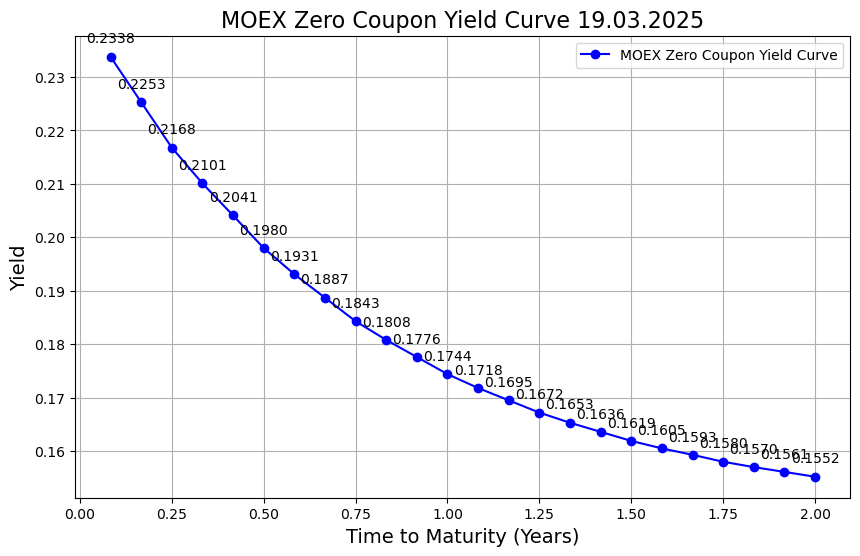

In [412]:
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, marker='o', linestyle='-', color='b', label=yield_curve_name)
plt.title(f'{yield_curve_name} {data_input_date}', fontsize=16)
plt.xlabel('Time to Maturity (Years)', fontsize=14)
plt.ylabel('Yield', fontsize=14)
plt.grid(True)
for i, (x, y) in enumerate(zip(maturities, yields)):
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.show()

In [413]:
#Please select product type:
#To select the Installment Loan - input 1
#To select the Revolving Credit Line - input 2
#To select the Deposit - input 3
#To select the Savings Account - input 4
product = 1

#Please select the product maturity in months (m1-m24):
maturity = m12

In [414]:
#Credit Spread Calc:

#Please select the borrower's Credit Rating (A, B, or C):
CR = 'B'
if CR == 'A':
    PD = 0.05
elif CR == 'B':
    PD = 0.1
else:
    PD = 0.2

#Please select the collateral coverage percent (as a decimal):
collateralpct = 0.75
LGD = 1-collateralpct

CS = PD*LGD
print(f'The Credit Spread for this Client is {CS*100} %')

The Credit Spread for this Client is 2.5 %


In [415]:
#Optionality Interest Spread Calc:
def black_scholes_put(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price
S0 = 100000  # Current account balance ($) - hypothetical, used for scaling
K = 100000   # Strike price ($) - equal to the account balance
T = 1       # Time to maturity (1 year)
r = maturity    # Product maturity rate
if product == 2: # Volatility of the account balance / client activity (as a decimal)
    sigma = 0.05
else: sigma = 0.2
put_price = black_scholes_put(S0, K, T, r, sigma)
OS = (put_price / S0)
OS1 = (put_price / S0) * 100
print(f"Optionality Interest Spread (APR): {OS1:.2f}%")

Optionality Interest Spread (APR): 1.93%


In [416]:
#Bank Profit Settings:

OC = 0.005 #Operating Costs in pct (as a decimal)
#Please input the desired Asset Interest Margin (as a decimal):
IM = 0.05

In [417]:
#Final Product Calculations:
if product == 1:
    rate = maturity+CS+IM+OC
    print(f'The APR on the Installment Loan is {rate*100:.2f} %')
elif product == 2:
    rate = maturity+CS+IM+OS+OC
    print(f'The APR on the Revolving Credit Line is {rate*100:.2f} %')
elif product == 3:
    rate = maturity+IM-OC
    print(f'The APR on the Deposit is {rate*100:.2f} %')
else: 
    rate = maturity+IM-OS-OC
    print(f'The APR on the Savings Account is {rate*100:.2f} %')

The APR on the Installment Loan is 25.44 %
